In [28]:
import os
import numpy as np
from nibabel.testing import data_path
from nilearn import plotting
import nibabel as nib

In [2]:
sample_image = '/home/jaume/Documentos/DL_postgraduate/final_project/sample_data/imagesTr/pancreas_001.nii.gz'
img = nib.load(sample_image)

(512, 512, 110)

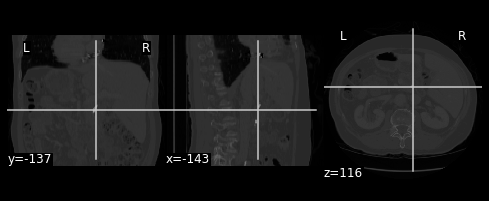

In [3]:
plotting.plot_anat(img)
img.shape

In [4]:
import pylab as plt

In [8]:
img.affine

array([[   0.64453101,    0.        ,    0.        , -329.35534668],
       [   0.        ,    0.64453101,    0.        , -329.35534668],
       [   0.        ,    0.        ,    2.5       ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [9]:
img.header.get_zooms()

(0.644531, 0.644531, 2.5)

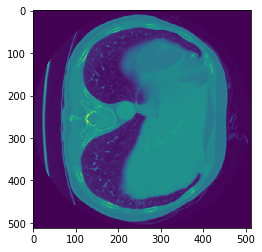

In [31]:
plt.imshow(img.dataobj[:,:,80])

RESIZE

In [55]:
target_shape = np.array((512,512,200))
new_resolution = [2,]*3
new_affine = np.full((4,4),0)
new_affine[:3,:3] = np.diag(new_resolution)
# putting point 0,0,0 in the middle of the new volume - this could be refined in the future
new_affine[:3,3] = target_shape*new_resolution/2.*-1
new_affine[3,3] = 1.
downsampled_and_cropped_nii = resample_img(img, target_affine=new_affine, target_shape=target_shape, interpolation='nearest')

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [56]:
downsampled_and_cropped_nii.shape

(512, 512, 200)

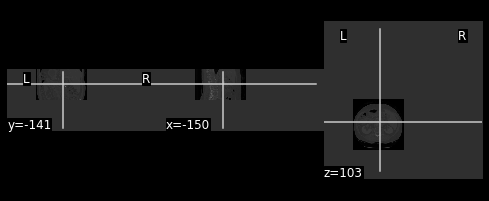

In [57]:
plotting.plot_anat(downsampled_and_cropped_nii)


In [71]:
import numpy as np
import nibabel as nib
import itertools

output_path = '/home/jaume/Documentos/DL_postgraduate/final_project/sample_data/imagesTr/pancreas_001_resized.nii.gz'

initial_size_x = 512
initial_size_y = 512
initial_size_z = 110

new_size_x = 512
new_size_y = 512
new_size_z = 95

initial_data = img.get_data()

delta_x = initial_size_x/new_size_x
delta_y = initial_size_y/new_size_y
delta_z = initial_size_z/new_size_z

new_data = np.full((new_size_x,new_size_y,new_size_z),1024)

for x, y, z in itertools.product(range(new_size_x),
                                 range(new_size_y),
                                 range(new_size_z)):
    new_data[x][y][z] = initial_data[int(x*delta_x)][int(y*delta_y)][int(z*delta_z)]

img_resized = nib.Nifti1Image(new_data, np.eye(4))
img_resized.to_filename(output_path)

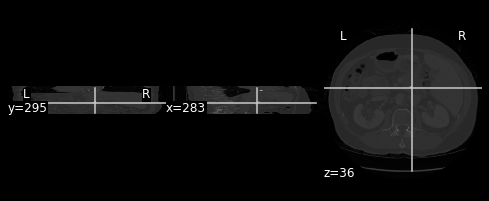

In [67]:
plotting.plot_anat(img_resized)

In [68]:
img_resized.shape

(512, 512, 90)

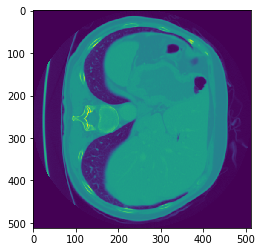

In [69]:
plt.imshow(img_resized.dataobj[:,:,60])

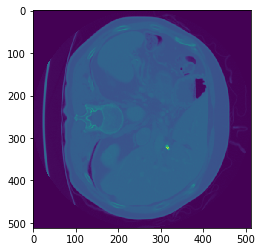

In [70]:
plt.imshow(img.dataobj[:,:,60])

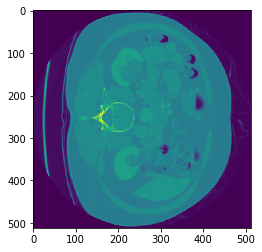

In [75]:
saved_img = nib.load(output_path)
plt.imshow(img.dataobj[:,:,30])

In [76]:
saved_img.shape

(512, 512, 95)

In [78]:
saved_img.header.get_zooms()

(1.0, 1.0, 1.0)